# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 8.8808401471885485, performing 43.6 it/sec
Step 100: Loss = 3.5894154155598992, performing 122.3 it/sec
Step 200: Loss = 1.3899322372417870, performing 83.5 it/sec
Step 300: Loss = 0.7852534713261355, performing 72.9 it/sec
Step 400: Loss = 0.3777675757392123, performing 55.3 it/sec
Step 500: Loss = 0.1668640029292166, performing 63.1 it/sec
No improvement since Step 460, early stopping.
[Best]  Step 459: Loss = 0.1655258144874935
[Final] Step 509: Loss = 0.1672619487730221

predicted end states
------------------------------------
         5th       Mean      95th
LF2F-1  3.17e-04  3.17e-04  3.17e-04
LF2F-2  6.24e-11  6.25e-11  6.25e-11
LF2F-3  4.31e-05  4.31e-05  4.31e-05
LF2F-4  8.48e-12  8.49e-12  8.49e-12
LF2F-5  9.88e-12  9.89e-12  9.90e-12
LF2F-6  1.60e-09  1.60e-09  1.60e-09
LF2F-7  6.46e-11  6.46e-11  6.47e-11


predicted

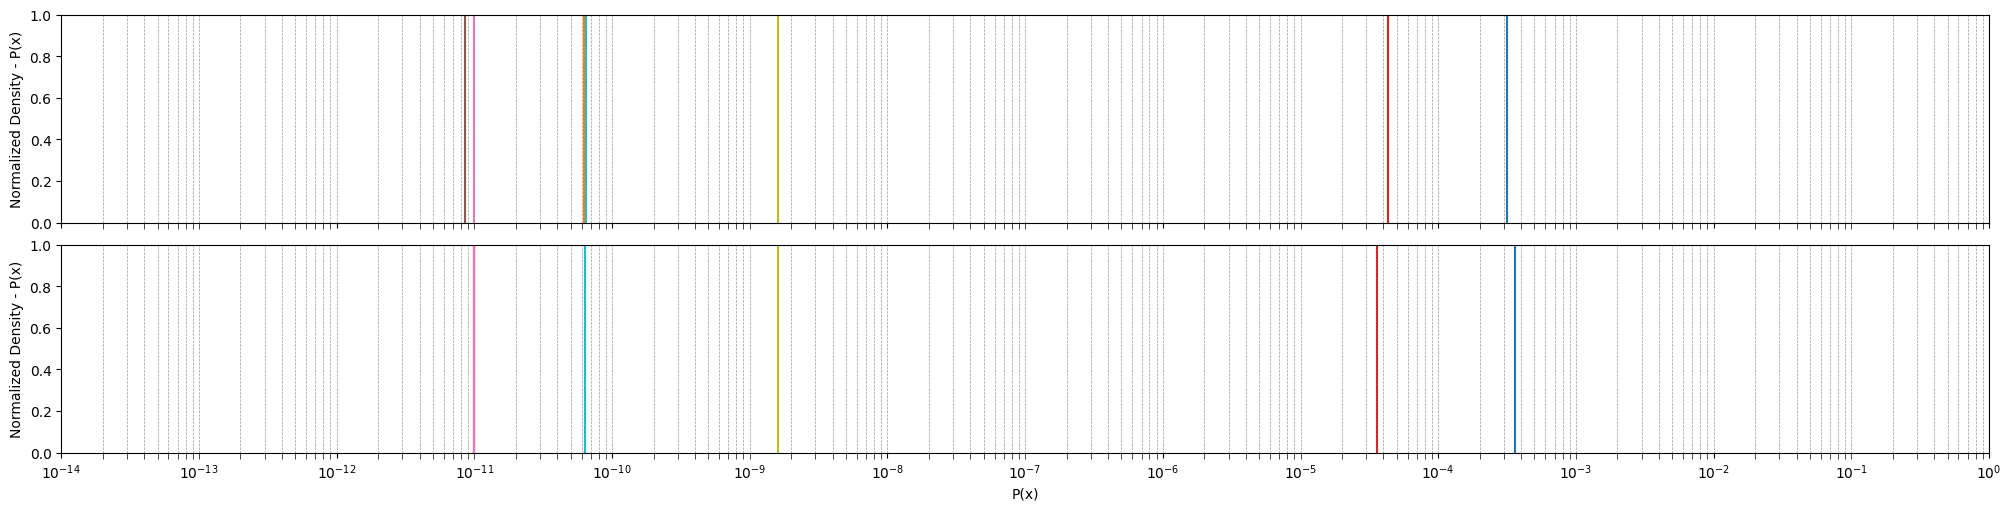

In [3]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 3.6e-4,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['LF2F', 'FSIG', 'FROD', 'BPHR', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LF2F-1': {
        'sequence': [1, 0, 0, 0, np.nan, 0],
        'probability': 3.6e-4,
    },
    'LF2F-2': {
        'sequence': [1, 0, 0, 0, np.nan, 1],
        'probability': 1e-11,
    },
    'LF2F-3': {
        'sequence': [1, 0, 0, 1, 0, 0],
        'probability': 3.6e-5,  # frequency unknown
    },
    'LF2F-4': {
        'sequence': [1, 0, 0, 1, 0, 1],
        'probability': 1.0e-11,
    },
    'LF2F-5': {
        'sequence': [1, 0, 0, 1, 1, np.nan],
        'probability': 1.0e-11,
    },
    'LF2F-6': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan],
        'probability': 1.6e-9,
    },
    'LF2F-7': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 6.4e-11,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)